# Gem Stone Analysis - SHREYA R

#### `Problem Statement :`

Case study: Login on kaggle, find out cubic zirconia.csv dataset
https://www.kaggle.com/nabanic/diamond-price-prediction-linear-regression 
    
Data set: 
https://www.kaggle.com/input/gemstone-price-prediction/cubic_zirconia.csv 

Data dictionary: 
https://www.kaggle.com/input/gemstone-price-prediction/data_dictionary.xlsx 

Problem 1: Perform `explanatory data analysis`, and `univariate` and `multivariate analysis`.


### Import the Required Libraries :

In [1]:
# for basic mathematical operations:
import numpy as np
import pandas as pd

# for plotting the data :
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import seaborn as sns

# to ignore the warning :
import warnings
warnings.filterwarnings('ignore')

### Data Information :

In [2]:
# About the data information :
data_information = pd.read_excel(r'Data Dictionary.xlsx')
data_information

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


### Load the Data :

In [3]:
df = pd.read_csv(r'cubic_zirconia.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


As we can see the dataset is been loaded into our jupyter notebook. We'll further perform data cleaning for the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.shape

(26967, 11)

## Exploratory Data Analysis :

### `A. Data Cleaning` :

In [6]:
# we will remove the first column as there are two row index values in our dataframe :
df = df.drop(columns = ['Unnamed: 0'], axis=1)
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
# we will find for the number of null values present in the dataset :
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

From the above result, we can see that there are approx of 700 null values in the depth column of the dataframe.

In [8]:
# Percentage of Null value in particular column :
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

depth 0.0258  % missing values


In [9]:
# As the percentage of the null value is very minimal, so we'll replace them with the mean values
df['depth'] = df['depth'].fillna(df['depth'].mean())

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
# Observe the columns :
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [12]:
#Check for the values which are equal to zero.
print("Number of rows with x = 0: {} ".format((df.x==0).sum()))
print("Number of rows with y = 0: {} ".format((df.y==0).sum()))
print("Number of rows with z = 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth = 0: {} ".format((df.depth==0).sum()))

Number of rows with x = 0: 3 
Number of rows with y = 0: 3 
Number of rows with z = 0: 9 
Number of rows with depth = 0: 0 


So we'll drop these rows 

In [13]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [14]:
df.shape

(26958, 10)

In [15]:
# lets check for the duplicate values i.e. repeated entry in the dataframe :
duplicates = df.duplicated()
print('Number of duplicate rows in the dataframe = %d' % (duplicates.sum()))

Number of duplicate rows in the dataframe = 33


In [16]:
df.drop_duplicates(inplace=True) 
print('Dataset after removing the duplicates :', df.shape)

Dataset after removing the duplicates : (26925, 10)


Hence, there are no Duplicate Records found in the dataframe.

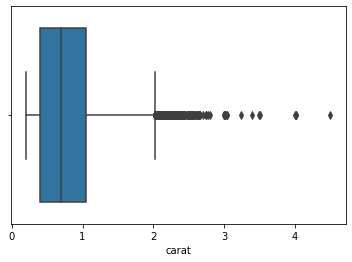

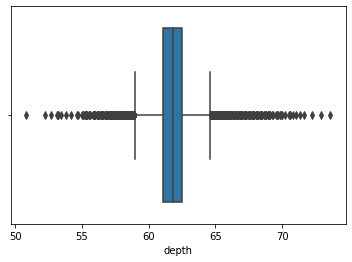

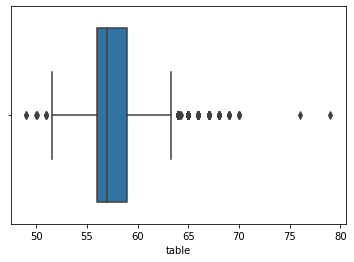

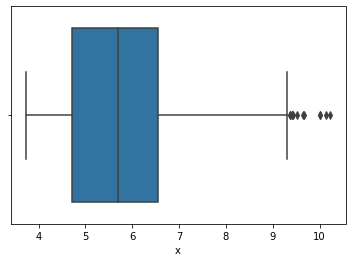

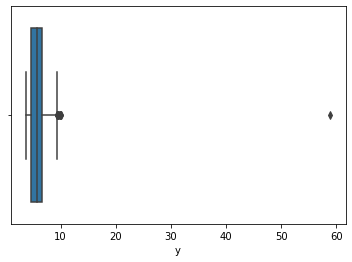

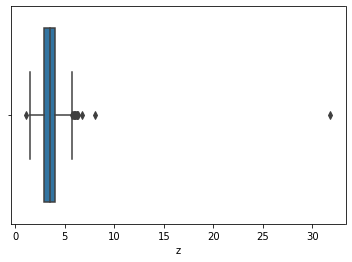

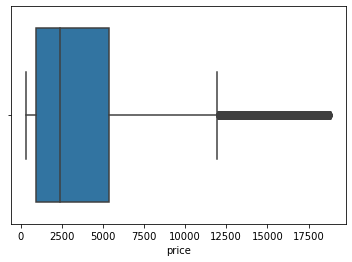

In [18]:
cols = ['carat','depth', 'table', 'x', 'y', 'z','price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Outlier treatment :

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

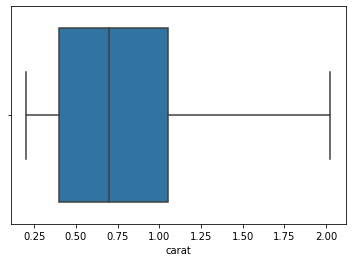

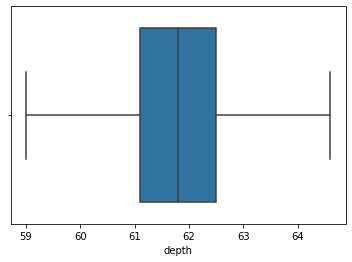

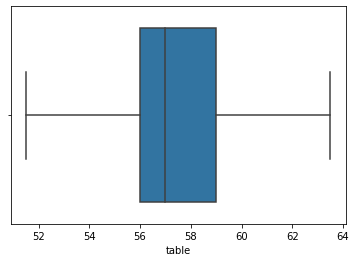

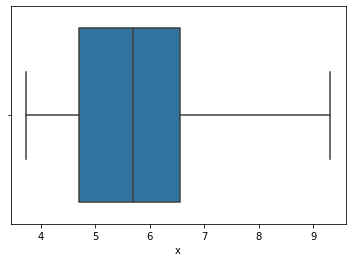

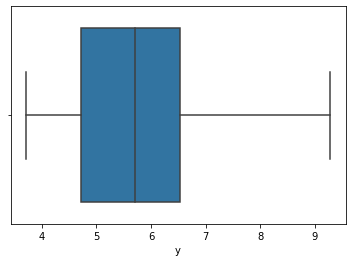

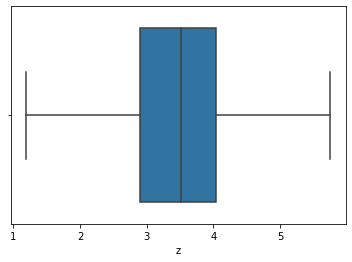

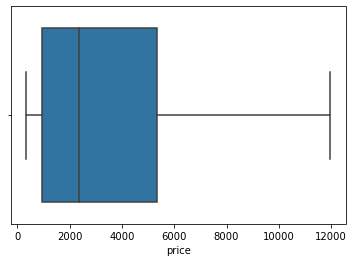

In [23]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Univariate Analysis :

Lets perform the univariate analysis :

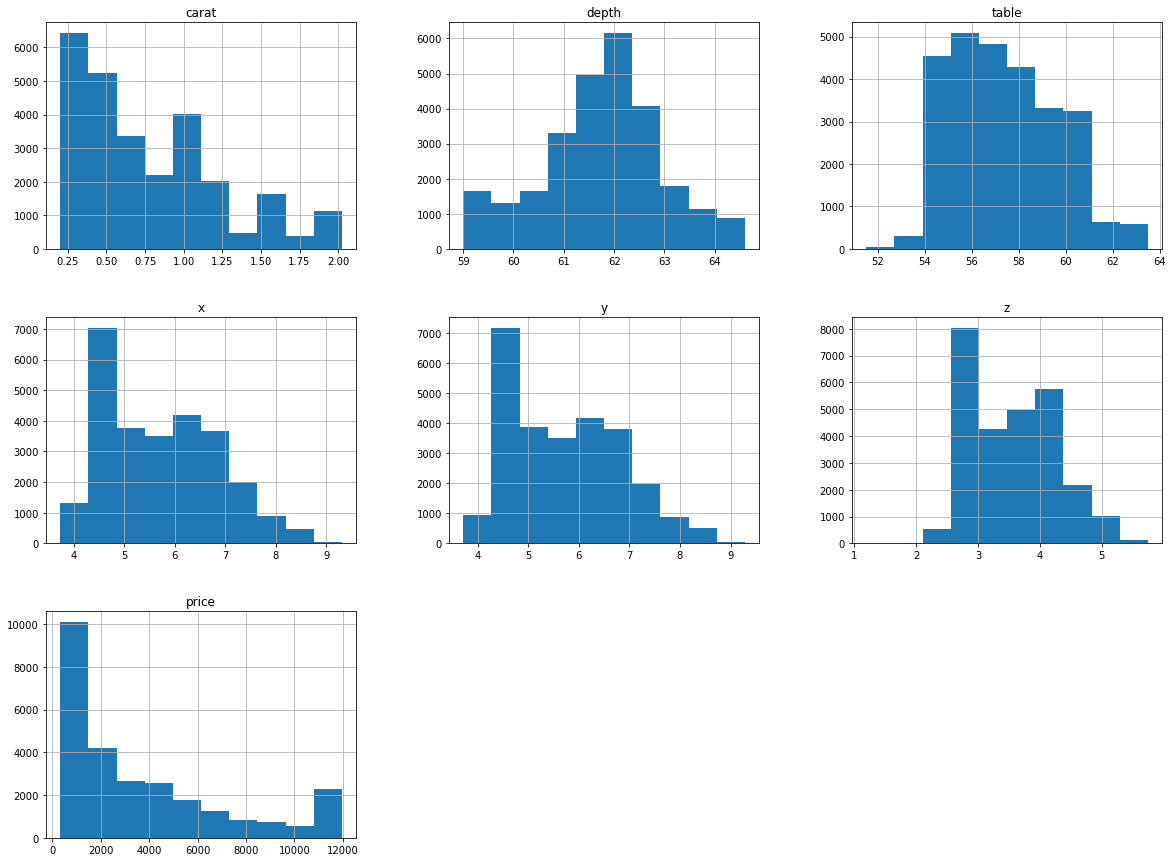

In [25]:
df.hist(figsize=(20,15));

In [26]:
 # to measure the skeweness of every attribute.
df.skew()  

carat    0.917214
depth   -0.190991
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

1. There is significant amount of outlier present in some variable. 

2. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed

###  Bivariate Analysis :

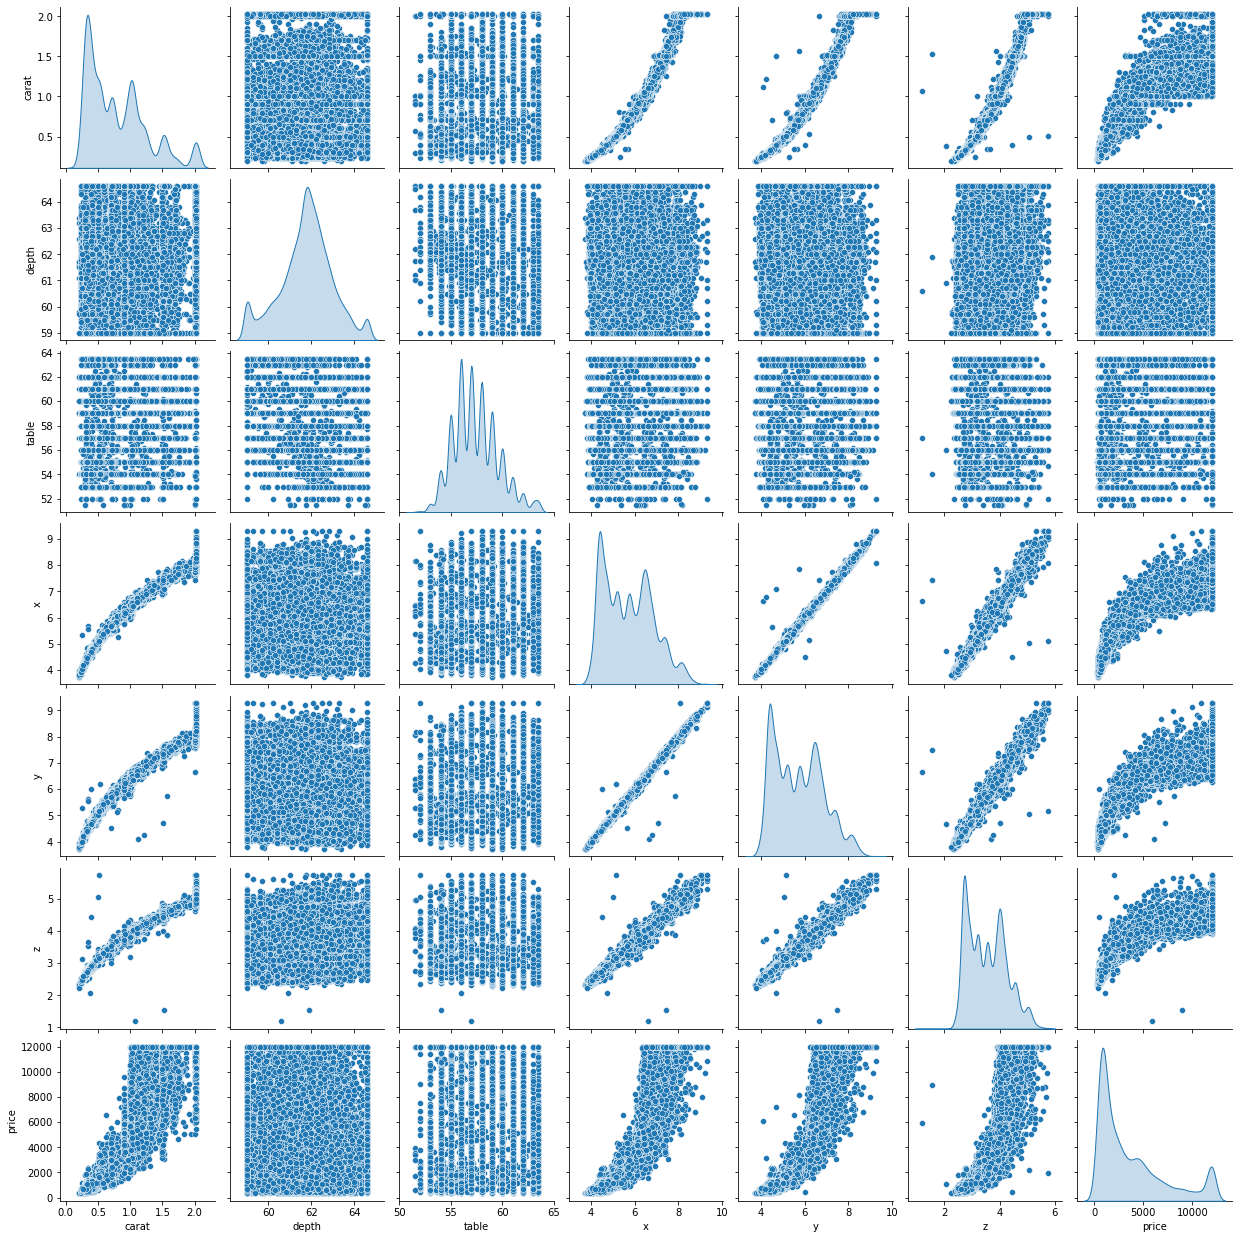

In [27]:
df_attr = (df[cols])
sns.pairplot(df, diag_kind='kde')  
plt.show()

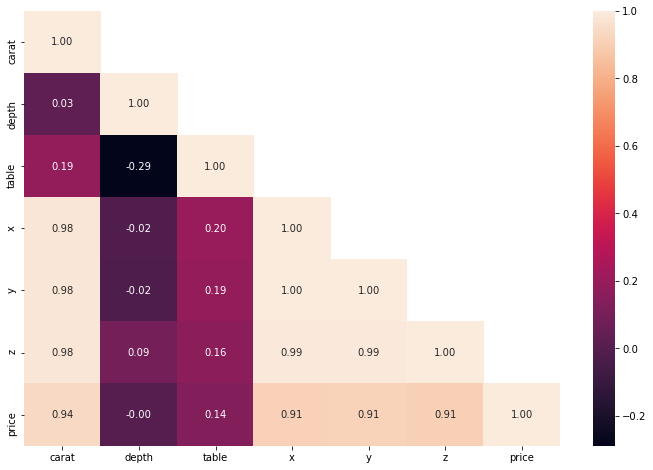

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',mask=np.triu(df.corr(),+1))
plt.show()

In [30]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth   -0.000862
Name: price, dtype: float64

It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

Text(-9.074999999999996, 0.5, 'Count of Gem')

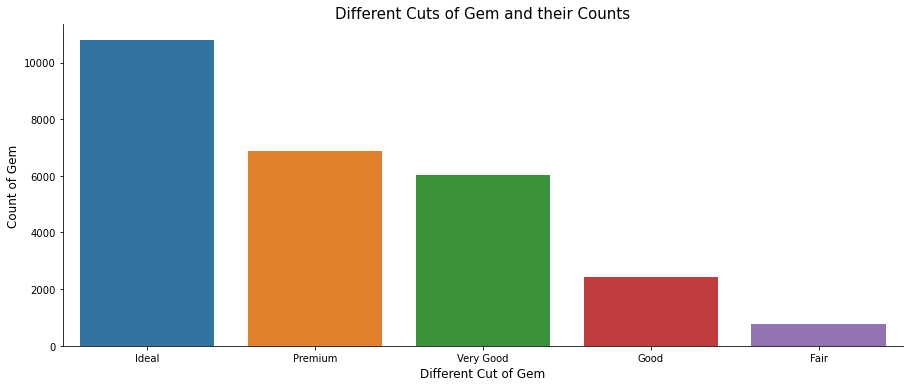

In [44]:
# EDA for categorical columns 'CUT'.
s = sns.catplot('cut', data=df, kind='count',aspect=2.5)
plt.title('Different Cuts of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Cut of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

Text(-9.074999999999996, 0.5, 'Count of Gem')

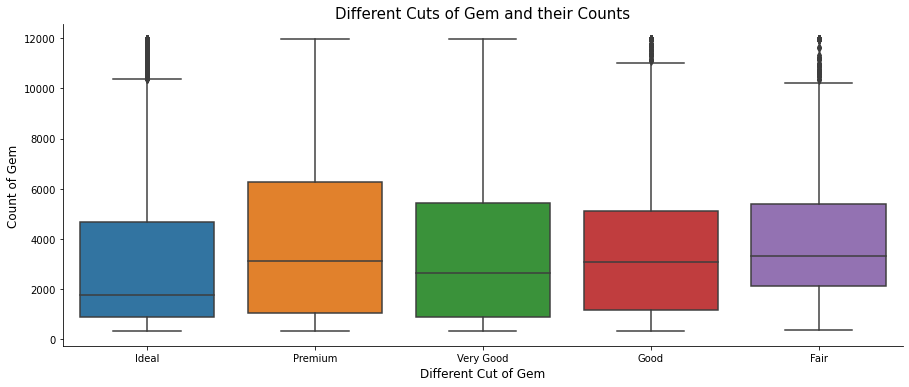

In [42]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)
plt.title('Different Cuts of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Cut of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

From the above catplot we can see that, the Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

Text(-2.6999999999999957, 0.5, 'Count of Gem')

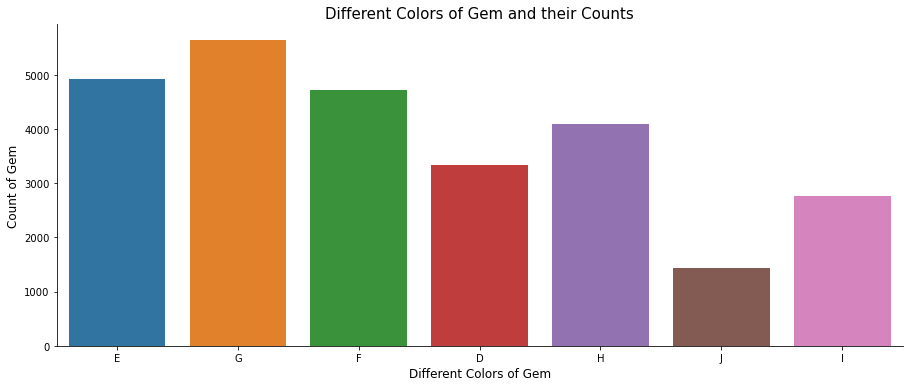

In [45]:
# EDA for categorical columns 'Color'.
sns.catplot('color', kind='count', data=df, aspect=2.5)
plt.title('Different Colors of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Colors of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

Text(-9.074999999999996, 0.5, 'Count of Gem')

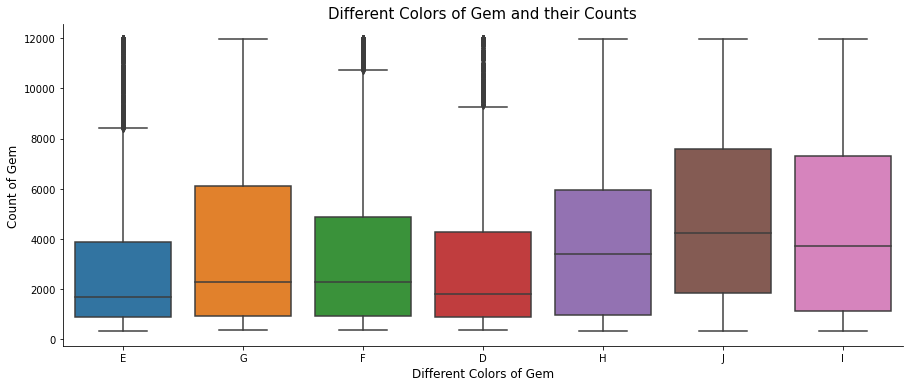

In [46]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')
plt.title('Different Colors of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Colors of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

From the above plot, we can see that the colors 'J' and 'I' are the most expensive!

Text(-2.6999999999999957, 0.5, 'Count of Gem')

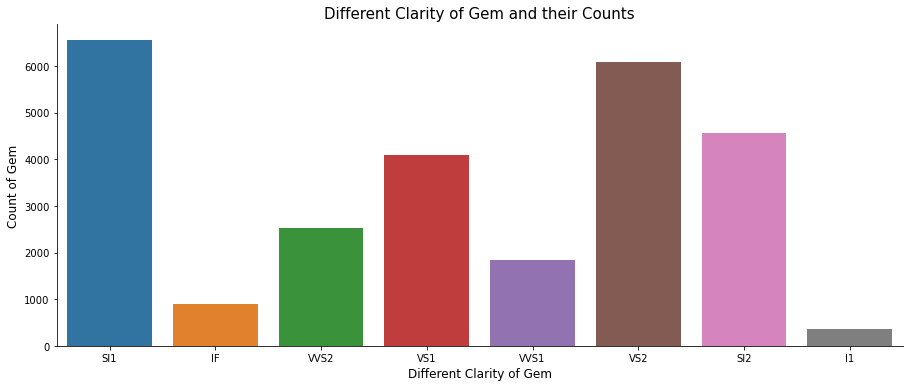

In [47]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=df, kind='count',aspect=2.5)
plt.title('Different Clarity of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Clarity of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

Text(-9.074999999999996, 0.5, 'Count of Gem')

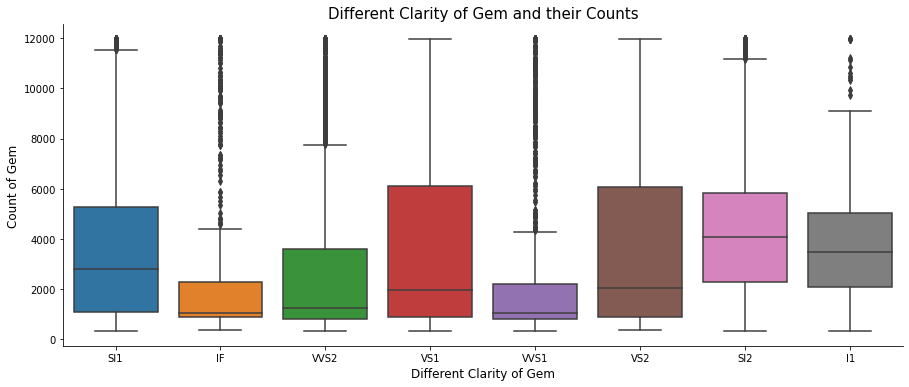

In [48]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')
plt.title('Different Clarity of Gem and their Counts', fontsize = 15)
plt.xlabel('Different Clarity of Gem', fontsize = 12)
plt.ylabel('Count of Gem',fontsize = 12)

From the above plot, we can see that the Diamonds clarity with VS1 & VS2 are the most Expensive.